In [1]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

In [3]:
from Bio.PDB import PDBParser, PDBIO
from Bio.PDB.PDBExceptions import PDBConstructionWarning
import warnings
import itertools

# Suppress PDB construction warnings
warnings.simplefilter('ignore', PDBConstructionWarning)

def get_ca_distance(structure, residue1, residue2, chain_id='A'):
    """
    Calculate the C-alpha distance between two residues within a structure object.

    Parameters:
    - structure: PDB structure object.
    - residue1, residue2: Residue numbers (integers) of the residues to measure.
    - chain_id: ID of the chain where the residues are located (default is chain 'A').

    Returns:
    - distance: Distance between the C-alpha atoms of the specified residues.
    """
    # Select chain and residues
    chain = structure[0][chain_id]  # Assume using the first model
    res1 = chain[residue1]
    res2 = chain[residue2]

    # Fetch the 'CA' atoms if they exist
    if 'CA' in res1 and 'CA' in res2:
        ca1 = res1['CA']
        ca2 = res2['CA']
        # Calculate distance
        distance = ca1 - ca2
        return distance
    else:
        return None

def calculate_pairwise_distances(pdb_file, residues_dict, chain_id='A'):
    """
    Calculate pairwise C-alpha distances for a set of residues specified in a dictionary.

    Parameters:
    - pdb_file: Path to the PDB file.
    - residues_dict: Dictionary mapping indices to residue numbers.
    - chain_id: Chain ID to look for residues.

    Returns:
    - distances: Dictionary of tuple (residue pair) to distance.
    """
    # Parse the PDB file
    parser = PDBParser()
    structure = parser.get_structure('PDB', pdb_file)

    # Calculate distances for all pairs
    distances = {}
    for (idx1, res1), (idx2, res2) in itertools.combinations(residues_dict.items(), 2):
        distance = get_ca_distance(structure, res1, res2, chain_id)
        distances[(res1, res2)] = distance

    return distances


In [32]:
from SSMuLA.landscape_global import LIB_INFO_DICT
from SSMuLA.fitness_process_vis import parse_lib_stat

In [5]:
LIB_INFO_DICT

{'DHFR': {'positions': {1: 26, 2: 27, 3: 28},
  'codons': {1: 'GCC', 2: 'GAT', 3: 'CTC'},
  'AAs': {1: 'A', 2: 'D', 3: 'L'},
  'type': 'Enzyme activity'},
 'ParD2': {'positions': {1: 61, 2: 64, 3: 80},
  'codons': {1: '', 2: '', 3: ''},
  'AAs': {1: 'I', 2: 'L', 3: 'K'},
  'type': 'Binding'},
 'ParD3': {'positions': {1: 61, 2: 64, 3: 80},
  'codons': {1: '', 2: '', 3: ''},
  'AAs': {1: 'D', 2: 'K', 3: 'E'},
  'type': 'Binding'},
 'GB1': {'positions': {1: 39, 2: 40, 3: 41, 4: 54},
  'codons': {1: '', 2: '', 3: '', 4: ''},
  'AAs': {1: 'V', 2: 'D', 3: 'G', 4: 'V'},
  'type': 'Binding'},
 'T7': {'positions': {1: 748, 2: 756, 3: 758},
  'codons': {1: '', 2: '', 3: ''},
  'AAs': {1: 'N', 2: 'R', 3: 'Q'},
  'type': 'Enzyme activity',
  'pdb_resrange': [71, 883]},
 'TEV': {'positions': {1: 146, 2: 148, 3: 167, 4: 170},
  'codons': {1: '', 2: '', 3: '', 4: ''},
  'AAs': {1: 'T', 2: 'D', 3: 'H', 4: 'S'},
  'type': 'Enzyme activity',
  'pdb_resrange': [1, 218]},
 'TrpB3A': {'positions': {1: 104,

In [6]:
from glob import glob
import pandas as pd
import numpy as np

In [7]:
df = pd.DataFrame(columns=["lib", "res1", "res2", "dist"])

In [8]:
chain_id = "A"
for lib, l_d in LIB_INFO_DICT.items():
    if "TrpB" not in lib:
        pdb_path = f"data/{lib}/{lib}.pdb"
       
    else:
        pdb_path = "data/TrpB/TrpB.pdb"
        # Parse the PDB file
    
    parser = PDBParser()
    structure = parser.get_structure("PDB", pdb_path)

    for (idx1, res_id1), (idx2, res_id2) in itertools.combinations(
        l_d["positions"].items(), 2
    ):
        df = df._append(
            {
                "lib": lib,
                "res1": res_id1,
                "res2": res_id2,
                "dist": get_ca_distance(structure, res_id1, res_id2, chain_id),
            },
            ignore_index=True,
        )

/tmp/ipykernel_2478114/119231806.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append(


In [9]:
df

,lib,res1,res2,dist
0,DHFR,26,27,3.858454
1,DHFR,26,28,5.567288
2,DHFR,27,28,3.854704
3,ParD2,61,64,5.123970
4,ParD2,61,80,24.626389
5,ParD2,64,80,21.775848
6,ParD3,61,64,5.069069
7,ParD3,61,80,25.044012
8,ParD3,64,80,22.605225
9,GB1,39,40,3.800648


In [10]:
pwd = df[["lib", "dist"]].groupby(["lib"]).agg(["mean", "std"])
pwd.columns = ["mean", "std"]
pwd

,mean,std
lib,,
DHFR,4.426816,0.987680
GB1,5.937460,1.897223
ParD2,17.175402,10.533715
ParD3,17.572769,10.896963
T7,5.548943,0.895833
TEV,9.039277,1.346600
TrpB3A,4.771533,1.712375
TrpB3B,4.877015,1.899704
TrpB3C,4.605879,1.412602


In [27]:
pwe = pd.read_csv("/disk2/fli/SSMuLA/results/pairwise_epistasis_vis/none/scale2max.csv")
pwe

,lib,n_mut,pos_calc_filter_min,summary_type,epistasis_type,value
0,DHFR,all,none,count,magnitude,538000.000000
1,DHFR,single,none,count,magnitude,24575.000000
2,DHFR,double,none,count,magnitude,285763.000000
3,DHFR,all,none,count,sign,369049.000000
4,DHFR,single,none,count,sign,17743.000000
...,...,...,...,...,...,...
283,TrpB4,single,none,fraction,sign,0.381144
284,TrpB4,double,none,fraction,sign,0.365450
285,TrpB4,all,none,fraction,reciprocal sign,0.092746
286,TrpB4,single,none,fraction,reciprocal sign,0.079531


In [45]:
pwe[(pwe["n_mut"]=="all")&(pwe["summary_type"]=="fraction")]

,lib,n_mut,pos_calc_filter_min,summary_type,epistasis_type,value
9,DHFR,all,none,fraction,magnitude,0.581696
12,DHFR,all,none,fraction,sign,0.399023
15,DHFR,all,none,fraction,reciprocal sign,0.019281
27,GB1,all,none,fraction,magnitude,0.598813
30,GB1,all,none,fraction,sign,0.328611
33,GB1,all,none,fraction,reciprocal sign,0.072576
45,ParD2,all,none,fraction,magnitude,0.656810
48,ParD2,all,none,fraction,sign,0.273991
51,ParD2,all,none,fraction,reciprocal sign,0.069199
63,ParD3,all,none,fraction,magnitude,0.688274


In [29]:
from scipy.stats import spearmanr

In [42]:
pwe[(pwe["n_mut"]=="all")&(pwe["summary_type"]=="fraction")&(pwe["epistasis_type"]=="magnitude")]["value"]

9      0.581696
27     0.598813
45     0.656810
63     0.688274
81     0.479881
99     0.438969
117    0.396780
135    0.457143
153    0.407537
171    0.504616
189    0.373575
207    0.463874
225    0.480577
243    0.382514
261    0.567490
279    0.539145
Name: value, dtype: float64

In [44]:
pwe[(pwe["n_mut"]=="all")&(pwe["summary_type"]=="fraction")&(pwe["epistasis_type"]=="sign")]["value"]

12     0.399023
30     0.328611
48     0.273991
66     0.255475
84     0.362891
102    0.353552
120    0.380682
138    0.285714
156    0.361087
174    0.359262
192    0.374093
210    0.351747
228    0.399576
246    0.406557
264    0.340686
282    0.368108
Name: value, dtype: float64

In [46]:
spearmanr(pwd["mean"], 1-pwe[(pwe["n_mut"]=="all")&(pwe["summary_type"]=="fraction")&(pwe["epistasis_type"]=="magnitude")]["value"])

SignificanceResult(statistic=-0.3411764705882353, pvalue=0.1959326248678891)

In [47]:
spearmanr(pwd["mean"], pwe[(pwe["n_mut"]=="all")&(pwe["summary_type"]=="fraction")&(pwe["epistasis_type"]=="sign")]["value"])

SignificanceResult(statistic=-0.3764705882352941, pvalue=0.1506481152876309)

In [48]:
spearmanr(pwd["mean"], pwe[(pwe["n_mut"]=="all")&(pwe["summary_type"]=="fraction")&(pwe["epistasis_type"]=="reciprocal sign")]["value"])

SignificanceResult(statistic=-0.29411764705882354, pvalue=0.268846554622893)

In [53]:
lib_stat = parse_lib_stat(
    lib_csv_path="results/fitness_distribution/max/all_lib_stats.csv", n_mut_cuttoff=0
)

active_cutoff = 1
active_lib_list = lib_stat[lib_stat["percent_active"]>=active_cutoff]["lib"].tolist()

In [54]:
pwd[pwd.index.isin(active_lib_list)]

,mean,std
lib,,
DHFR,4.426816,0.987680
GB1,5.937460,1.897223
ParD2,17.175402,10.533715
ParD3,17.572769,10.896963
T7,5.548943,0.895833
TEV,9.039277,1.346600
TrpB3D,4.329240,0.905299
TrpB3E,4.458372,1.139608
TrpB3F,7.579371,2.203567


In [56]:
print(spearmanr(pwd[pwd.index.isin(active_lib_list)]["mean"], 1-pwe[(pwe["lib"].isin(active_lib_list))&(pwe["n_mut"]=="all")&(pwe["summary_type"]=="fraction")&(pwe["epistasis_type"]=="magnitude")]["value"]))

SignificanceResult(statistic=-0.3076923076923077, pvalue=0.3305892594121097)


In [19]:
import matplotlib.pyplot as plt

%matplotlib inline

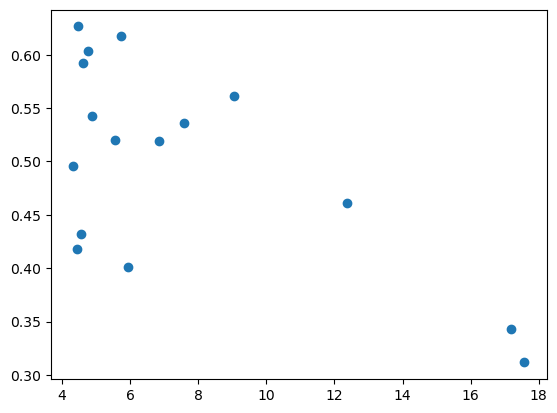

In [58]:
plt.plot(pwd["mean"], 1-pwe[(pwe["n_mut"]=="all")&(pwe["summary_type"]=="fraction")&(pwe["epistasis_type"]=="magnitude")]["value"], "o")

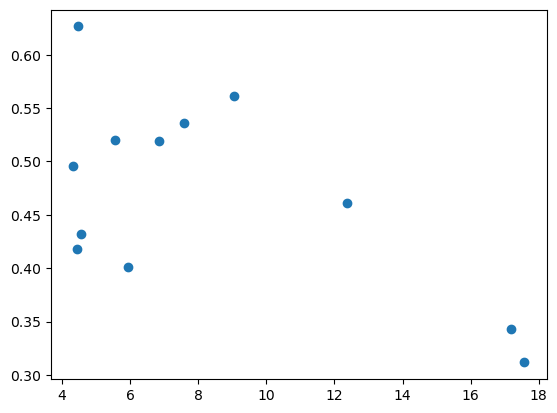

In [59]:
plt.plot(pwd[pwd.index.isin(active_lib_list)]["mean"], 1-pwe[(pwe["lib"].isin(active_lib_list))&(pwe["n_mut"]=="all")&(pwe["summary_type"]=="fraction")&(pwe["epistasis_type"]=="magnitude")]["value"], "o")

In [60]:
pwe = pd.read_csv("/disk2/fli/SSMuLA/results/pairwise_epistasis_vis/active_min/scale2max.csv")
pwe

,lib,summary_type,epistasis_type,value
0,DHFR,count,magnitude,1.827680e+05
1,DHFR,count,sign,7.946800e+04
2,DHFR,count,reciprocal sign,1.405600e+04
3,DHFR,fraction,magnitude,6.615030e-01
4,DHFR,fraction,sign,2.876232e-01
...,...,...,...,...
67,TrpB4,count,sign,1.001345e+06
68,TrpB4,count,reciprocal sign,2.671920e+05
69,TrpB4,fraction,magnitude,5.923642e-01
70,TrpB4,fraction,sign,3.217755e-01


In [61]:
pwe[(pwe["summary_type"]=="fraction")&(pwe["epistasis_type"]=="magnitude")]

,lib,summary_type,epistasis_type,value
3,DHFR,fraction,magnitude,0.661503
9,GB1,fraction,magnitude,0.640882
15,TrpB3A,fraction,magnitude,0.909091
21,TrpB3B,fraction,magnitude,0.000000
27,TrpB3C,fraction,magnitude,1.000000
33,TrpB3D,fraction,magnitude,0.523802
39,TrpB3E,fraction,magnitude,0.692308
45,TrpB3F,fraction,magnitude,0.505051
51,TrpB3G,fraction,magnitude,0.448127
57,TrpB3H,fraction,magnitude,0.400000


In [25]:
print(spearmanr(pwd["mean"], pwe[(pwe["summary_type"]=="fraction")&(pwe["epistasis_type"]=="magnitude")]["value"]))

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 16 and the array at index 1 has size 12